In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.circuit.library import CSwapGate as cswap

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


Enter 'n': 4


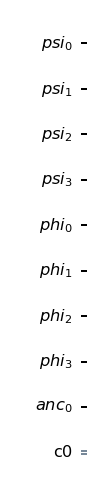

In [2]:
n = int(input("Enter 'n': "))
psi = QuantumRegister(n, name='psi')
phi = QuantumRegister(n, name='phi')
anc = QuantumRegister(1, name='anc')
cla = ClassicalRegister(1)

circ = QuantumCircuit(psi, phi, anc, cla)
circ.draw(output='mpl')

In [3]:
backend = Aer.get_backend('qasm_simulator')
#import numpy as np
#arr = np.empty((0))
p = int(input("Enter 'p': "))
for j in range(1, p):
    circ.h(anc[0])
    for i in range(1, n):
        circ.cswap(anc[0], psi[i], phi[i])
        circ.h(anc[0])
        circ.measure(anc[0], cla[0])
circ.draw(output='mpl')

job = execute(circ,backend,shots=512)
counts = job.result().get_counts(circ)

print(counts)
#s = 1 - ((2/p) * np.sum(arr))
#print("s = ", s)

Enter 'p': 4
{'0': 262, '1': 250}


In [4]:
type(counts)

qiskit.result.counts.Counts

In [19]:
print(counts.values())

dict_values([262, 250])
